# Linear Regression Project

<font size="3">An exemplary project is executed to showcase prediction using Machine Learning via the Linear Regression module of Scikit. In this project, a certain garment would like to decide on their future business strategy. The company is situated in New York and its business model is that customers visit its store for a personal consultation with a designer and make an order via a mobile app or a web site.
    
The purpose of this project is to assist the decision-making process of whether to focus on the mobile app experience or web site development. A linear regression is used for the prediction and the data set can be found from the following link: https://www.kaggle.com/srolka/ecommerce-customers  
 </font>

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import grid
import seaborn as sns
%matplotlib inline

## Data and info

In [2]:
customers = pd.read_csv('Ecommerce Customers')

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

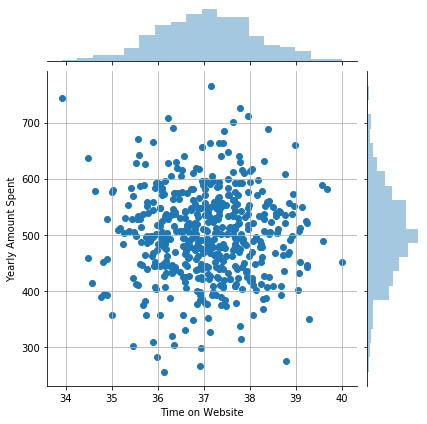

In [6]:
g = sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers, ratio=5)
ax = g.ax_joint
ax.grid(True)

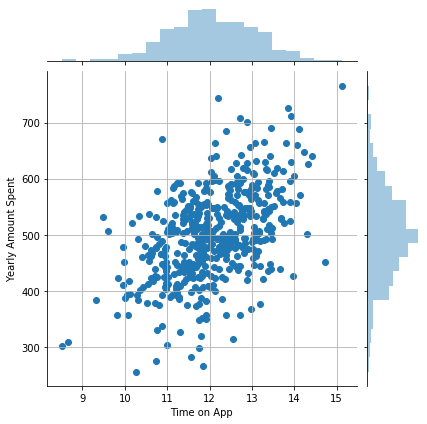

In [7]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers).ax_joint.grid(True)

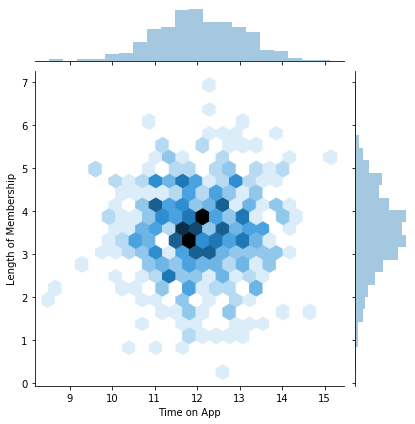

In [8]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers,kind='hex')

sns.pairplot(customers)
plt.grid()

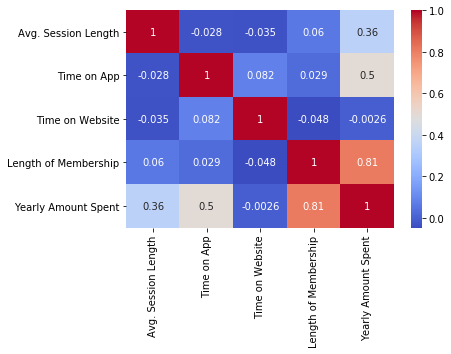

In [10]:
sns.heatmap(customers.corr(),cmap='coolwarm',annot=True)

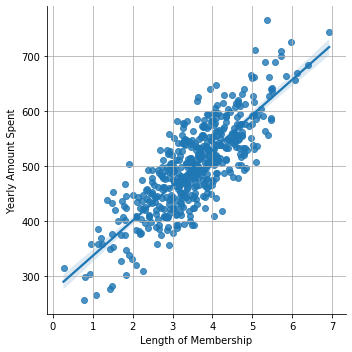

In [11]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)
plt.grid()

## Training and Testing Data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [15]:
X = customers[['Avg. Session Length', 'Time on App','Time on Website', 'Length of Membership']]

In [16]:
y = customers['Yearly Amount Spent']

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Training the Model

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lm = LinearRegression()

In [20]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
pd.DataFrame(lm.coef_,X.columns)

,0
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [22]:
pred = lm.predict(X_test)

Text(0, 0.5, 'prediction')

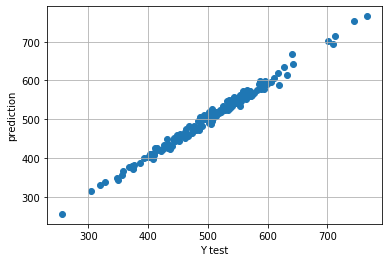

In [23]:
plt.scatter(x=y_test,y=pred)
plt.grid(True)
plt.xlabel('Y test')
plt.ylabel('prediction')

## Evaluating the Model

In [24]:
from sklearn import metrics

In [25]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))

MAE: 7.228148653430853


In [26]:
print('MAE: ',metrics.mean_absolute_error(y_test,pred))
print('MSE: ',metrics.mean_squared_error(y_test,pred))
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE:  7.228148653430853
MSE:  79.81305165097487
RMSE:  8.933815066978656


## Residuals

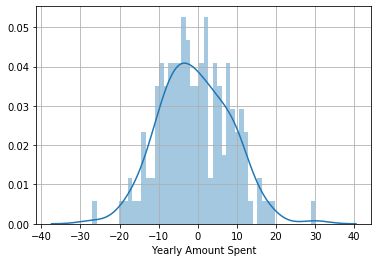

In [27]:
sns.distplot(y_test-pred, bins=50)
plt.grid(True)

## Conclusion

<font size="3">The data analysis shows that most of the customers use the mobile app to purchase products by a large margine. Therefore, the company may decide to imporve their web site so that they may attract more customers. </font>